In [1]:
import pandas as pd


In [4]:
pd.__version__

'0.25.0'

In [5]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


In [11]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#shape is attribute not method
iris.shape 


(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#pull rows and coulumn
spc=iris['species']
#or method2
spc=iris.species 
#this work only for single coulmn method 1 
#is more reliabe and general

In [13]:
#for multiple coulmns pass a list of names (python list is [])
iris[['species','petal_width']].head()

,species,petal_width
0,setosa,0.2
1,setosa,0.2
2,setosa,0.2
3,setosa,0.2
4,setosa,0.2


In [14]:
#print coulmn names
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
## Delete a coulmn
#M1- using python inbuilt del fn
del iris['species']
"""
del df.species 
this will not work better not to use this anytime
"""


KeyError: 'species'

In [19]:
 iris.drop( 'petal_width',axis=1, inplace=False)
    #axis to say we are droping the coulmn
    #id doesent remove coulmn from orginal dframe,
    #you can put inplace=true for 
    #droping coulmn from orginal dframe

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
5,5.4,3.9,1.7
6,4.6,3.4,1.4
7,5.0,3.4,1.5
8,4.4,2.9,1.4
9,4.9,3.1,1.5


In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


## Subsetting row

In [22]:
# Loc 
#pull out rows
#row names as parameters
df.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [23]:
df.loc[-1] #doesnt work as we have no -1 labeled data

KeyError: -1

In [24]:
#in iloc it referes index of row
df.iloc[-1]

sepal_length          5.9
sepal_width             3
petal_length          5.1
petal_width           1.8
species         virginica
Name: 149, dtype: object

In [25]:
df.ix[0]#will get depricated it looks for label name than index

D:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [26]:
df.iloc[[0,1,2]] #pass list of rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [27]:
df.loc[[0,1,2],['sepal_length','sepal_width']]
#thing on left od comma - how you subset the rows, 
#on right-how you subset coulmns

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [28]:
df.iloc[[0,1,2],[0,1]]# in iloc index goes

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [29]:
sep_wid_mean=df['sepal_width'].mean()

In [30]:
sep_wid_mean

3.0573333333333337

In [53]:
#boolean subsetting
df.loc[df['sepal_width']>sep_wid_mean,:].head()
# " : " for giving all coulmn or rows,
#in the case all coulmn as its in right of comma

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


# Groupby

In [36]:
df.groupby('species')

In [33]:
df.groupby('species')['sepal_width'].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

In [37]:
df.groupby('species')[['sepal_width','sepal_length']].mean()

,sepal_width,sepal_length
species,,
setosa,3.428,5.006
versicolor,2.770,5.936
virginica,2.974,6.588


In [39]:
df.groupby(['species','petal_width'])[['sepal_width','sepal_length']].mean()

sepal_width  sepal_length
species    petal_width                           
setosa     0.1             3.360000      4.820000
           0.2             3.379310      4.972414
           0.3             3.328571      4.971429
           0.4             3.785714      5.300000
           0.5             3.300000      5.100000
           0.6             3.500000      5.000000
versicolor 1.0             2.371429      5.414286
           1.1             2.466667      5.400000
           1.2             2.740000      5.780000
           1.3             2.746154      5.884615
           1.4             2.957143      6.357143
           1.5             2.880000      6.190000
           1.6             3.133333      6.100000
           1.7             3.000000      6.700000
           1.8             3.200000      5.900000
virginica  1.4             2.600000      6.100000
           1.5             2.500000      6.150000
           1.6             3.000000      7.200000
           1.7             2.500000      4.900000
           1.8             2.918182      6.445455
           1.9             2.680000      6.340000
           2.0             3.016667      6.650000
           2.1             3.033333      6.916667
           2.2             3.200000      6.866667
           2.3             3.087500      6.912500
           2.4             3.100000      6.266667
           2.5             3.400000      6.733333

In [47]:
#groupby create heirarchy they are not norma dataframe any more
# use method .reset_index() to make data frame

df.groupby(['species','petal_width'])[['sepal_width','sepal_length']].mean().reset_index()

,species,petal_width,sepal_width,sepal_length
0,setosa,0.1,3.360000,4.820000
1,setosa,0.2,3.379310,4.972414
2,setosa,0.3,3.328571,4.971429
3,setosa,0.4,3.785714,5.300000
4,setosa,0.5,3.300000,5.100000
5,setosa,0.6,3.500000,5.000000
6,versicolor,1.0,2.371429,5.414286
7,versicolor,1.1,2.466667,5.400000
8,versicolor,1.2,2.740000,5.780000
9,versicolor,1.3,2.746154,5.884615


In [45]:

#nunique count number of unique values
tem=df.groupby(['species'])[['sepal_width','sepal_length']].nunique()

In [52]:
df.to_csv("data/iris.csv",index=False)
#index = false remove rows index( by defalut it keeps them)

Plotting methods are in built

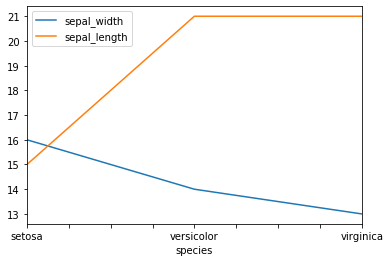

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

tem.plot()